# LGMVIP - DataScience

# Intermediate Level

## Task 2 - Prediction Using Decision Tree

### Importing The Necessary Modules

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

import warnings 
warnings.filterwarnings("ignore")

### Loading The DataSet To DataFrame 

In [7]:
df=pd.read_csv('C:/Users/mansurshaik/Downloads/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Removing The Unwanted Columns

In [8]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#Showing the stats of the dataframe
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#Showing the basic info of datatypes in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
#Getting the count of the species
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
#Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Visualization

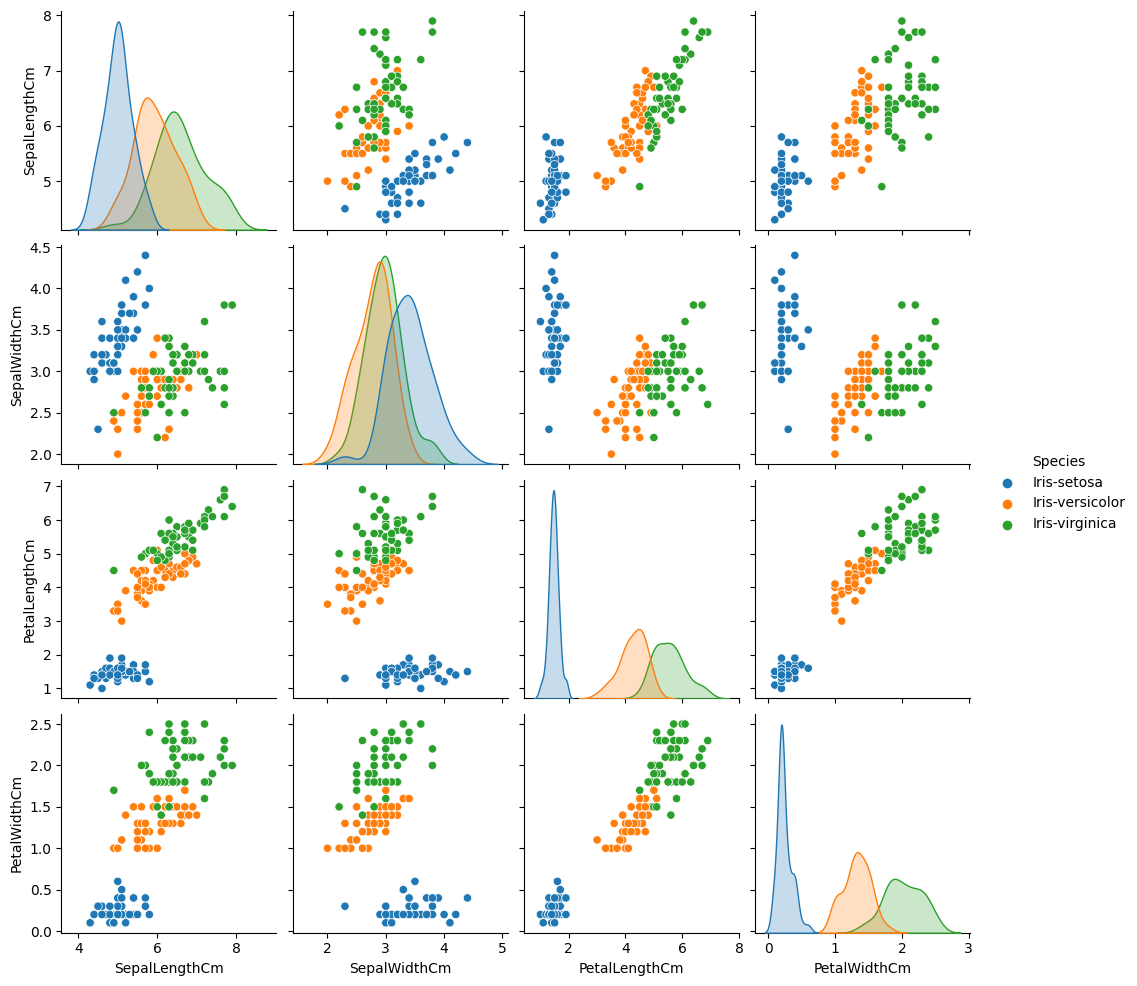

In [15]:
#pair plot to visualise the attributes all at once
sns.pairplot(data=df,hue='Species')

Text(0.5, 1.0, 'Plot map of features')

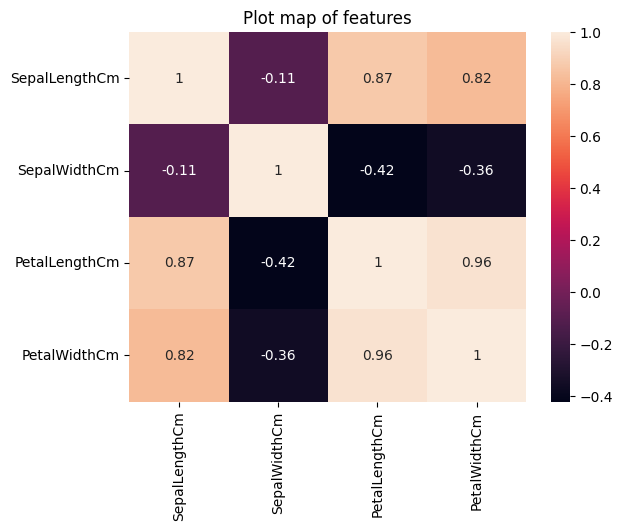

In [20]:
#correlation matrix
sns.heatmap(df.corr(),annot=True)
plt.title('Plot map of features')

In [22]:
#Seperate the target features(X) and variable(y) 
target=df['Species']
df1=df.copy()
df1=df1.drop('Species',axis=1)

In [24]:
X=df1
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [29]:
#Encode the categorical variable to numeric value
#Label Encoding
le=LabelEncoder()
target=le.fit_transform(target)
y=target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [33]:
#Spiltting the data 
#train_size:test_size=70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)


(105, 4)
(45, 4)


### Modeling Tree And Testing It

In [34]:
#Defining The Decision Tree Algo
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train) 
#Decision Tree created

DecisionTreeClassifier()

In [38]:
#Predicting the values of test data
y_pred=dtree.predict(X_test)
print("CLassification Report : \n",classification_report(y_test,y_pred))

CLassification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Text(0.5, 1.0, 'Accuracy Score:1.0')

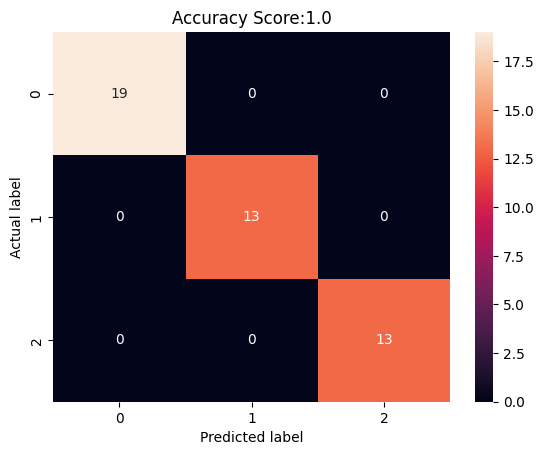

In [41]:
#Confusion Matrics 
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score:{0}'.format(dtree.score(X_test,y_test)))

### Visualizing The Decision Tree

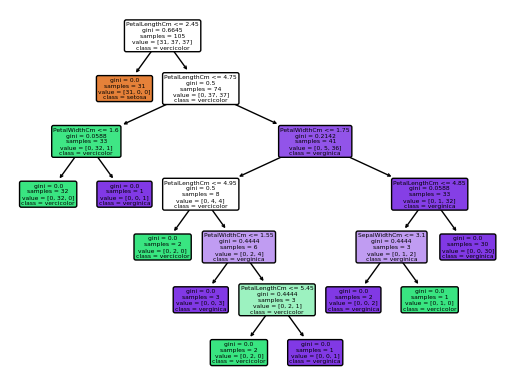

In [45]:
#visualizing the graph
dec_tree=plot_tree(decision_tree=dtree,feature_names=df1.columns,class_names=["setosa","vercicolor","verginica"],filled = True,precision=4,rounded=True)

In [46]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  1.0


In [51]:
#0-Iris-Setosa
#1-Iris-Versicolor
#2-Iris-Verginaca
print(*dtree.predict([[4.6,3.1,1.5,0.2]]))

0
